## tmp DAG tester to load

In [3]:
import pandas as pd
import arcgis
from arcgis.gis import GIS
import geopandas as gpd

In [4]:
df = pd.read_csv('./service_requests.csv')

/home/howens/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (14,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
# data clean 
df[["Latitude", "Longitude"]] = df[["Latitude", "Longitude"]].apply(pd.to_numeric)
gdf = gpd.GeoDataFrame(
      df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

In [8]:
gis = GIS("http://lahub.maps.arcgis.com/home/index.html", "hunterowens", os.environ.get('ESRI_PW'))

In [9]:
item_id = '9818f649545d44a197a913c8b8dff76d'

In [10]:
from arcgis.gis import Item
item = Item(gis, item_id)

In [13]:
gdf.head(10).to_file('/tmp/311-request', driver="ESRI Shapefile")

In [22]:
!zip -r /tmp/requests-311.zip /tmp/311-request

  adding: tmp/311-request/ (stored 0%)
  adding: tmp/311-request/311-request.cpg (stored 0%)
  adding: tmp/311-request/311-request.dbf (deflated 92%)
  adding: tmp/311-request/311-request.shp (deflated 43%)
  adding: tmp/311-request/311-request.shx (deflated 54%)


In [27]:
data_file_location = '/tmp/requests-311.zip'
requests = gis.content.add(item, data=data_file_location)

In [26]:
requests

<Item title:"service_requests_bulky" type:Feature Layer Collection owner:hunterowens>

<Item title:"service_requests_bulky" type:Feature Layer Collection owner:Tiffany.Chu_lahub>
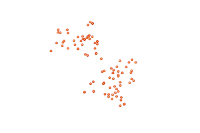

In [28]:
item